<a href="https://colab.research.google.com/github/Sp-supriya/HCDS-Projects/blob/main/Project_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Competitors: Analyze Their Products, Pricing, and Market Positioning**

In [ ]:
!pip install beautifulsoup4 requests pandas matplotlib seaborn transformers


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


In [ ]:
# Simulated data (replace this with scraping logic if actual URLs are allowed)
competitor_data = [
    {"name": "Product A", "price": 199, "description": "High-end AI-based productivity software"},
    {"name": "Product B", "price": 149, "description": "Budget-friendly collaboration tool"},
    {"name": "Product C", "price": 249, "description": "Premium secure communication platform"},
    {"name": "Product D", "price": 99,  "description": "Basic remote desktop software"},
]
df = pd.DataFrame(competitor_data)
df


,name,price,description
0,Product A,199,High-end AI-based productivity software
1,Product B,149,Budget-friendly collaboration tool
2,Product C,249,Premium secure communication platform
3,Product D,99,Basic remote desktop software


In [ ]:
# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# Define possible categories
categories = ["Productivity", "Security", "Communication", "Remote Work", "Collaboration"]

# Apply analysis
df["positioning"] = df["description"].apply(lambda x: classifier(x, categories)["labels"][0])
df


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


,name,price,description,positioning
0,Product A,199,High-end AI-based productivity software,Productivity
1,Product B,149,Budget-friendly collaboration tool,Collaboration
2,Product C,249,Premium secure communication platform,Security
3,Product D,99,Basic remote desktop software,Remote Work


In [ ]:
# Save as CSV
df.to_csv("competitor_analysis.csv", index=False)

# Download file
from google.colab import files
files.download("competitor_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

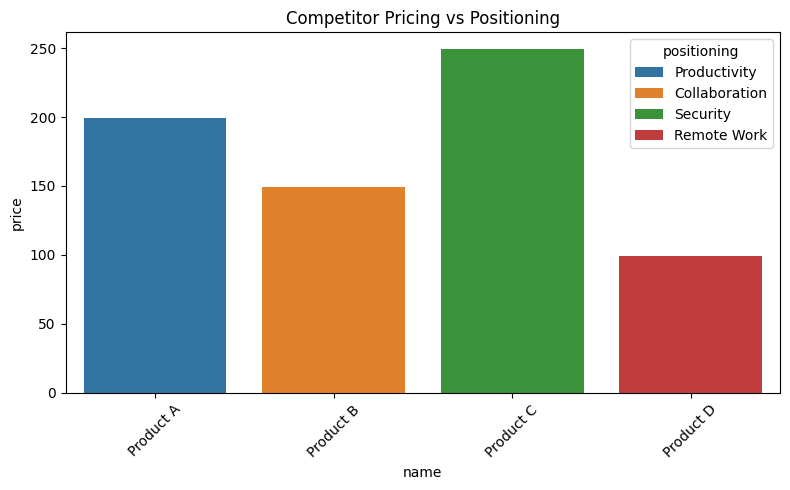

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="name", y="price", hue="positioning")
plt.title("Competitor Pricing vs Positioning")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from google.colab import files

# Sample competitor data
data = {
    "name": ["Product A", "Product B", "Product C", "Product D"],
    "price": [199, 149, 249, 99],
    "description": [
        "High-end AI-based productivity software",
        "Budget-friendly collaboration tool",
        "Premium secure communication platform",
        "Basic remote desktop software"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "competitor_input.csv"
df.to_csv(csv_filename, index=False)

# Download CSV file
files.download(csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("competitor_input.csv")
